<h1 style="color:white; background-color:#4CAF50; padding:10px; border-radius:10px; text-align:center;">
  Diabetes Dataset: A Data Analysis Project with Explanations
</h1>


# **Introduction to the Diabetes Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Columns in the Dataset:

The dataset contains the following columns:

| **Variable**                 | **Description**                                                   |
|------------------------------|-------------------------------------------------------------------|
| **Pregnancies**               | Number of pregnancies                                             |
| **Glucose**                   | Glucose level in blood                                            |
| **BloodPressure**             | Blood pressure measurement                                        |
| **SkinThickness**             | Thickness of the skin                                             |
| **Insulin**                   | Insulin level in blood                                            |
| **BMI**                       | Body mass index                                                   |
| **DiabetesPedigreeFunction**   | Likelihood of diabetes based on family history                    |
| **Age**                       | Age of the patient                                                |
| **Outcome**                   | Final result (1 = diabetes, 0 = no diabetes)                      |


## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Import Machine Learning Algorithms
from sklearn.model_selection import train_test_split  # Split data into training and testing sets for model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression for classification tasks
from sklearn.neighbors import KNeighborsClassifier  # KNN for classification

# Import Ensemble Learning Algorithms (combining multiple models for better performance)
from sklearn.ensemble import RandomForestClassifier  # Random Forest for robust classification
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting for decision tree-based learning with improved accuracy

# Evaluation Metrics (assessing model performance)
from sklearn.metrics import confusion_matrix  # Visualize model predictions vs. true labels
from sklearn.metrics import accuracy_score, recall_score, f1_score  # Calculate common performance metrics

## Import Dataset

In [2]:

df = pd.read_csv('Diabetes.csv')


print(df.head())
df.head()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h1 style="color:white; background-color:#4CAF50; padding:10px; border-radius:10px; text-align:center;">
  EDA (Explorary Data Analysis):
</h1>

#### Exploratory Data Analysis (EDA) is a method used to understand the structure of a dataset, discover important features, and gain initial insights about the data. EDA is typically the first step in data science projects and allows for a thorough examination of the data before model development.
#### During the data exploration phase, important methods and functions are used to understand the general characteristics of the data. Here are some commonly used methods in this process:

In [3]:
df.info()  # Displays general information about the DataFrame (column names, data types, missing values, etc.).

print(df.isnull().sum())  # Shows the count of missing values (NaN) in each column.

print(df.describe())  # Summarizes basic statistical details for numerical columns (mean, standard deviation, min, max, etc.).

df.corr()  # Calculates Pearson correlation coefficients between columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
df.shape  # Returns the dimensions of the DataFrame as (number of rows, number of columns).

(768, 9)

In [5]:
df.describe().T  # Returns the transposed summary statistics of the DataFrame (rows become columns and vice versa).

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Check for missing data

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#### Distribution of numeric Variables


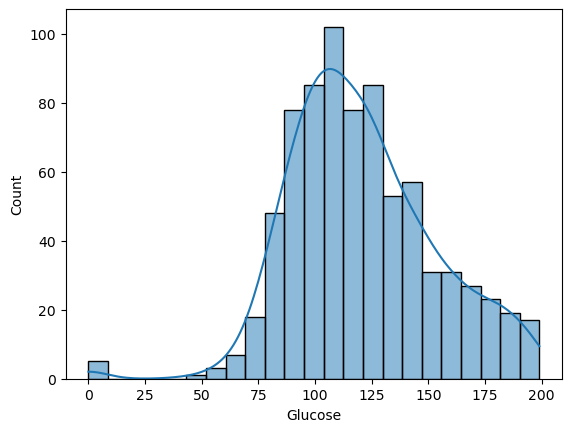

In [9]:

sns.histplot(df['Glucose'], kde=True)  # Plot the distribution of the 'Glucose' variable.
plt.show()


#### Feature Engineering
#### This involves transforming a continuous variable into categorical bins or intervals. It’s useful for simplifying models or dealing with non-linear relationships.
#### Example: Binning Age into age groups.

In [10]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 80], labels=['20-40', '40-60', '60-80'])

#### The code block at the bottom helps to quickly understand the distribution of values in each column, including the number of unique values and their frequencies.

In [11]:
df.columns=df.columns.str.lower()

In [12]:
for col in df.columns:  
    print(col, 'nunique is :', df[col].nunique())  # For each column, it prints the column name and the number of unique values.
    print('value counts is :', df[col].value_counts())  # Prints the count of each unique value in the column.
    print('---------------------------')  # Prints a separator line between columns.

pregnancies nunique is : 17
value counts is : pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
---------------------------
glucose nunique is : 136
value counts is : glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
---------------------------
bloodpressure nunique is : 47
value counts is : bloodpressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      

<h1 style="color:white; background-color:#4CAF50; padding:10px; border-radius:10px; text-align:center;">
  Data Visualization:
</h1>

### 1.) Distribution of Features
##### this process helps in understanding the distribution and spread of numerical features, allowing for insights into data patterns and potential outliers.
##### Plotting the distribution of numerical features is a fundamental step in exploratory data analysis (EDA), essential for understanding the dataset, guiding further analysis, and ensuring the quality and robustness of predictive models.















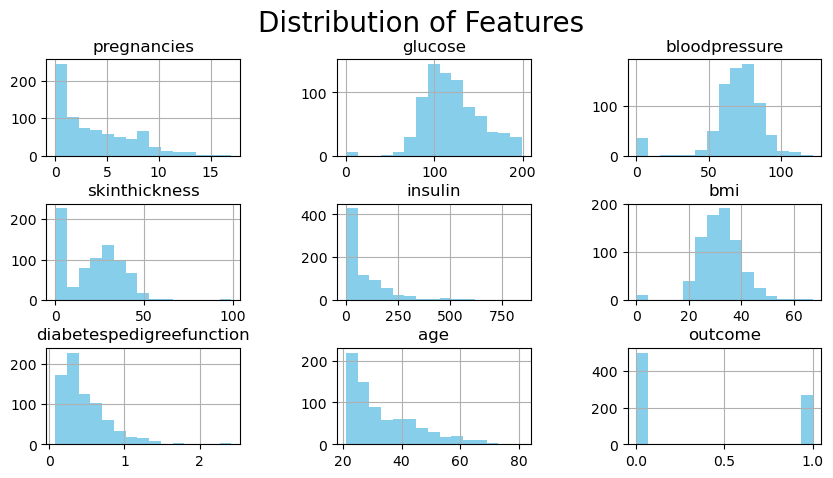

In [13]:
# Plotting the distribution of numerical features

df.hist(bins=15, figsize=(10,5), color='skyblue')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Distribution of Features', size=20)
plt.show()


### 2.) Correlation Heatmap
##### In Python data science, correlation refers to the way two variables are related to each other. The correlation coefficient measures this relationship and can take a value between -1 and 1:

##### 1: Strong positive relationship (as one increases, the other also increases).
##### 0: No relationship.
##### -1: Strong negative relationship (as one increases, the other decreases).
##### Examining the correlation between variables in a dataset helps you understand which ones move together. It plays an important role in modeling processes in machine learning and data analytics, as high correlation between certain variables can impact the performance of the model.
##### This process helps visualize the relationships between variables in the dataset, allowing you to understand which variables move together or are related to each other.

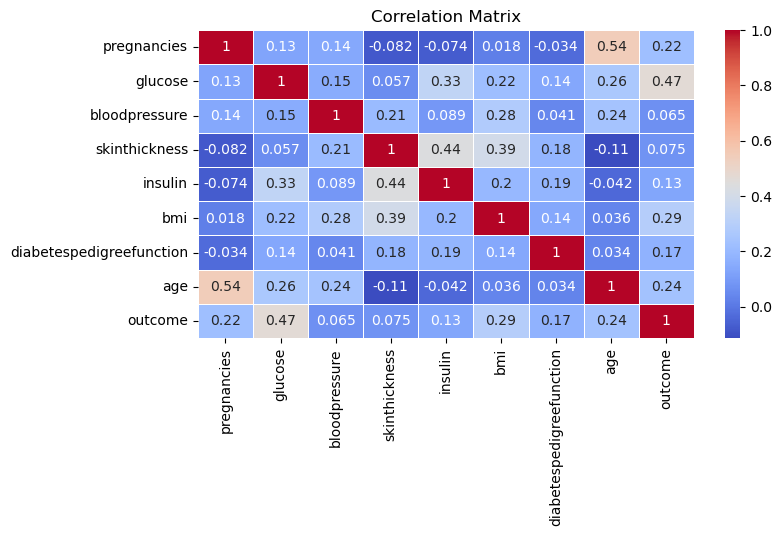

In [22]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Create the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 3.) Outcome Distribution
##### This code generates a count plot that displays the distribution of diabetic (Outcome = 1) and non-diabetic (Outcome = 0) patients in the dataset. The sns.countplot function from Seaborn is used to create a bar plot with the Outcome variable on the x-axis, showing the count of each category. The palette='viridis' argument specifies the color scheme, and a title is added to the plot with plt.title. Finally, the plot is shown using plt.show().

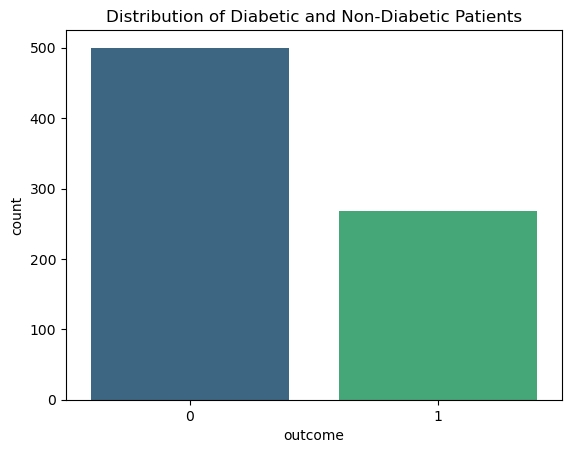

In [23]:
# Distribution of Outcome (Diabetic/Non-Diabetic)
sns.countplot(x='outcome', data=df, palette='viridis')
plt.title('Distribution of Diabetic and Non-Diabetic Patients', size=12)
plt.show()

### 4.) Relationships Between Features
##### Pairplot allows us to observe the relationships between all numerical variables in the dataset. The differences between diabetic and non-diabetic individuals are clearly displayed through colors. These plots are especially useful during Exploratory Data Analysis (EDA) for understanding the correlation between features and the impact of certain features on the classes. Each scatter plot shows how two variables interact and how this relationship is influenced by whether the individual is diabetic or not.

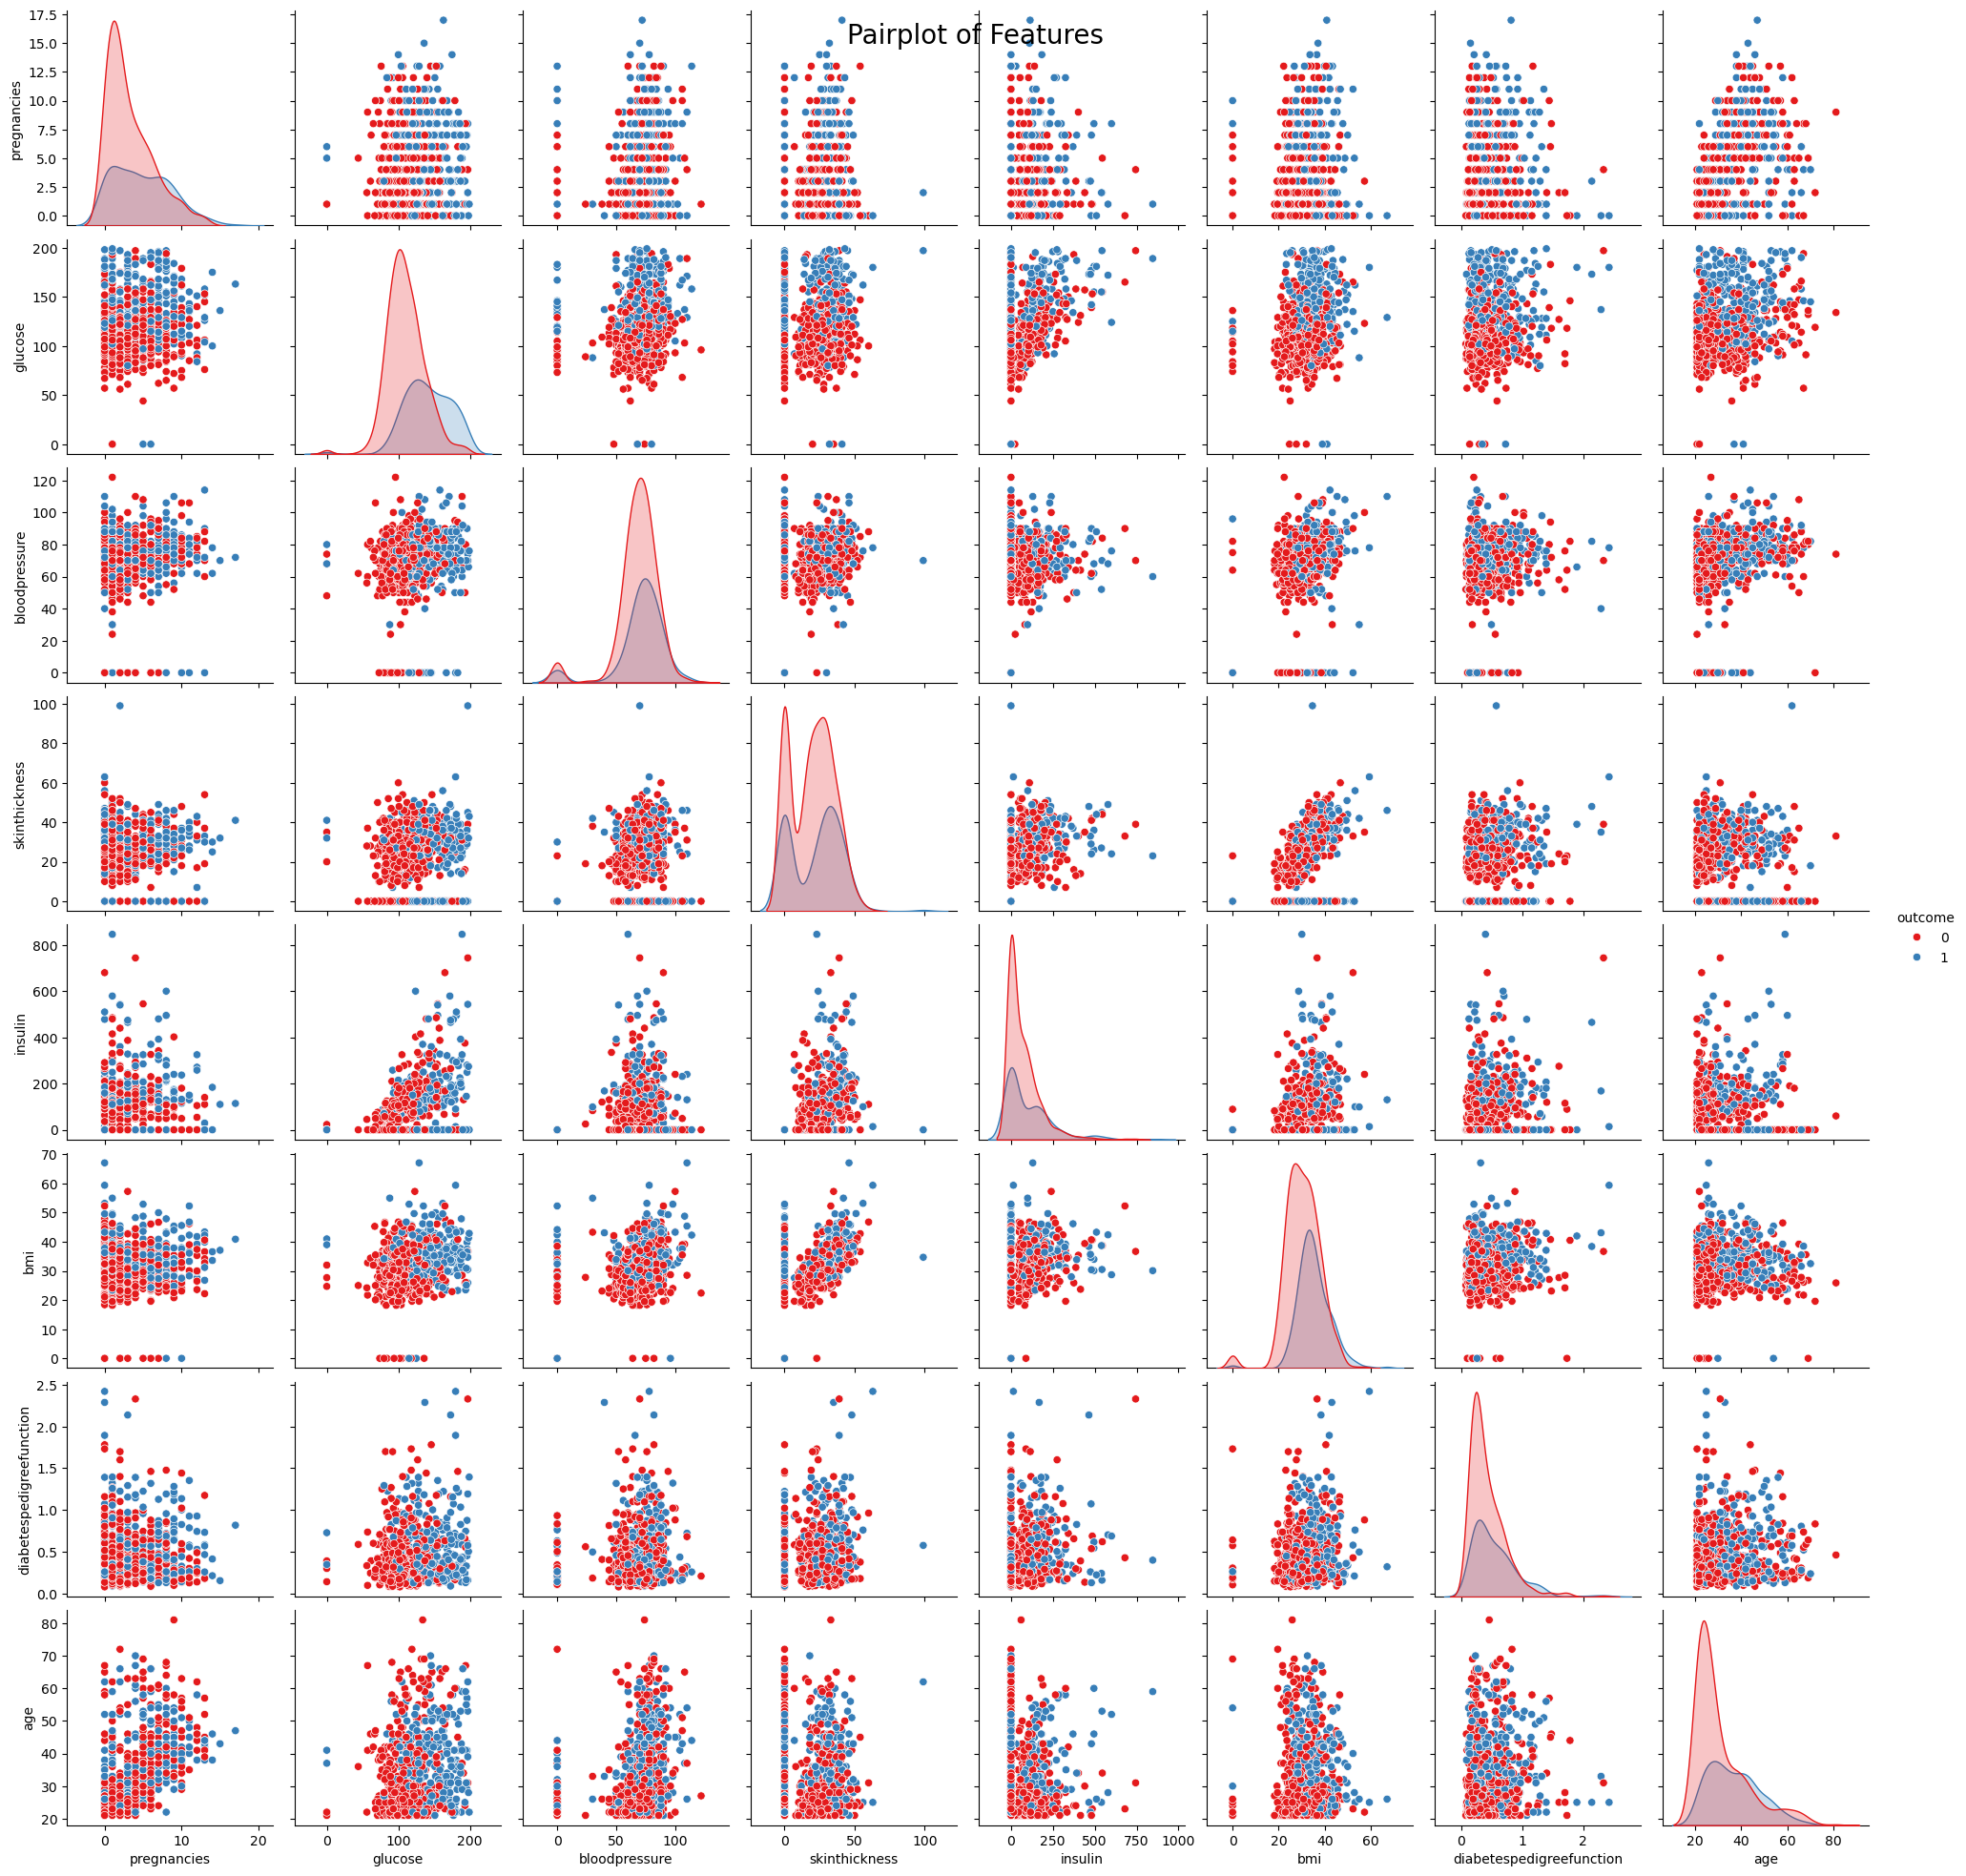

In [24]:
# Pairplot for relationships between features colored by Outcome
sns.pairplot(df, hue='outcome', palette='Set1')
plt.suptitle('Pairplot of Features', size=20)
plt.show()


### 5.) Boxplot for Outlier Detection
##### Outliers are data points that significantly differ from other observations in a dataset. They can occur due to variability in the data or may indicate errors or unusual conditions. Outliers are important to consider because they can distort statistical analyses, skew results, and affect the performance of predictive models. Identifying and appropriately handling outliers is crucial for ensuring data quality and the reliability of insights derived from the data.

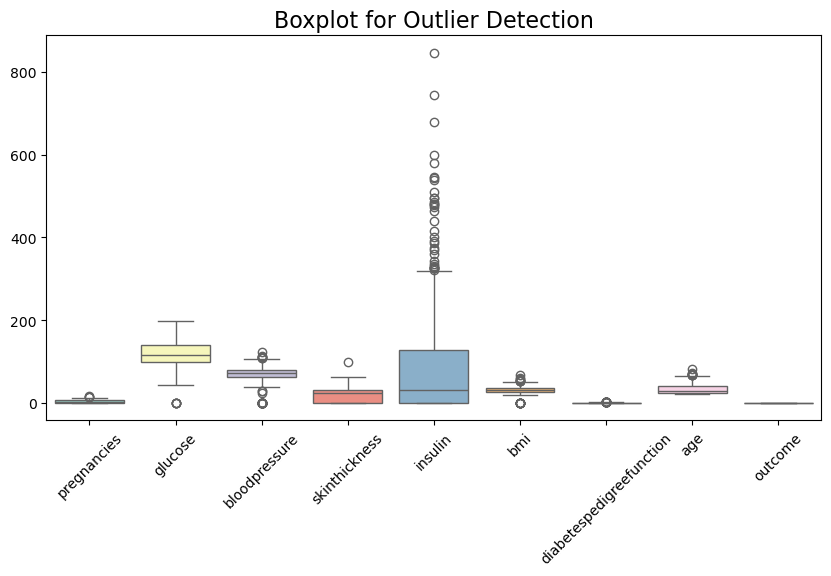

In [25]:
# Boxplots to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplot for Outlier Detection', size=16)
plt.show()

<h1 style="color:white; background-color:#4CAF50; padding:10px; border-radius:10px; text-align:center;">
  Direct Ploting with Matplotlib:
</h1>
## Normal Plotting vs. Direct Plotting

### Normal Plotting:
- **Basic Use**: Displays data points and curves in a specific arrangement.
- **Simplicity**: Generally a straightforward method for visualizing data and offers basic functionality.
- **Customization**: Users can customize the graph with certain parameters, but it tends to be less interactive and dynamic.

### Direct Plotting:
- **Working with Data**: Allows you to directly manipulate or change data on the graph. For instance, you can adjust data points by clicking and dragging them or modify a specific point through interaction.
- **Interactive**: Enables users to engage with the graph in a more interactive way, which is especially useful for dynamically observing and analyzing data.
- **Advanced Features**: Typically offers more tools and features, helping users to better understand the data.


In [26]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'age_group'],
      dtype='object')

In [27]:
import matplotlib.pyplot as plt

# Histogram of Glucose levels
plt.figure(figsize=(7, 3))
plt.hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot of Glucose levels
plt.figure(figsize=(7, 3))
plt.boxplot(df['Glucose'], vert=False)
plt.title('Boxplot of Glucose Levels')
plt.xlabel('Glucose Level')
plt.show()



KeyError: 'Glucose'

<Figure size 700x300 with 0 Axes>

## Folium for Mapping (If applicable)

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_Group'],
      dtype='object')

In [32]:
# Create random latitude and longitude values
np.random.seed(0)  # To make the results reproducible
df['Latitude'] = np.random.uniform(-90, 90, size=len(df))
df['Longitude'] = np.random.uniform(-180, 180, size=len(df))

# Check the coordinates
print(df[['Latitude', 'Longitude']].head())



    Latitude   Longitude
0   8.786431  167.813080
1  38.734086  105.076645
2  18.497408   63.248093
3   8.078973  -91.839787
4 -13.742136 -102.075386


#### We have saved the created map graph as an html file and we can examine it via Vs code with Open Live Server

In [39]:
# Create the map
diabetes_map1 = folium.Map(location=[0, 0], zoom_start=2)

# Show each age group with different colors
colors = {
    '18-29': 'blue',
    '30-39': 'green',
    '40-49': 'orange',
    '50+': 'red'
}

# Generate random coordinates
latitudes = np.random.uniform(-90, 90, size=len(df))
longitudes = np.random.uniform(-180, 180, size=len(df))

for i, row in df.iterrows():
    # Determine color based on age group
    color = colors[row['Age_Group']]
    folium.CircleMarker(
        location=[latitudes[i], longitudes[i]],  # Use random coordinates
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f'Age: {row["Age"]}, Outcome: {row["Outcome"]}'
    ).add_to(diabetes_map1)


diabetes_map1.save('diabetes_map1.html')


#### Larger radius for diabetes patients

In [41]:
# Create markers
for i, row in df.iterrows():
    
    color = colors[row['Age_Group']]
    
    # Increase the radius for those with Outcome 1 (diabetes)
    radius = 9 if row['Outcome'] == 1 else 5  # Larger radius for diabetes patients

    folium.CircleMarker(
        location=[latitudes[i], longitudes[i]],  # Use random coordinates
        radius=radius,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f'Age: {row["Age"]}, Outcome: {row["Outcome"]}'
    ).add_to(diabetes_map2)


diabetes_map2.save('diabetes_map2.html')


### This code provides an interactive map using folium that visually highlights the data points based on the Outcome and BMI fields. You can adjust the parameters and markers based on other variables to customize the visualization for your dataset.

In [16]:
import folium

# Example random coordinates (for the map)
latitudes = [41.0082, 39.9334, 38.4237, 36.8969, 40.1826]
longitudes = [28.9784, 32.8597, 27.1428, 30.7133, 29.0666]

# Create the map
diabetes_map = folium.Map(location=[39.9334, 32.8597], zoom_start=6)

# Define colors (e.g., based on Outcome)
colors = {0: 'green', 1: 'red'}  # 0: No diabetes, 1: Diabetes

# Random sample data
data = {
    'Age': [45, 34, 50, 29, 60],
    'Outcome': [1, 0, 1, 0, 1],
    'BMI': [25.3, 18.5, 30.1, 22.4, 33.2]
}
df = pd.DataFrame(data)

# Add markers to the map
for i, row in df.iterrows():
    
    color = colors[row['Outcome']]
    
    # Increase the radius for those diagnosed with diabetes (Outcome = 1)
    radius = 10 if row['Outcome'] == 1 else 6  # Larger for diabetes patients

    # Add CircleMarker to the map
    folium.CircleMarker(
        location=[latitudes[i], longitudes[i]],  # Coordinates
        radius=radius,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f'Age: {row["Age"]}, BMI: {row["BMI"]}, Outcome: {row["Outcome"]}'
    ).add_to(diabetes_map)

diabetes_map

## Explanation of the Correlation Heatmap
#### The correlation heatmap visualizes the linear relationships between the variables in the diabetes dataset. Each cell in the heatmap represents the correlation coefficient (ranging from -1 to 1) between two variables, indicating the strength and direction of their relationship:

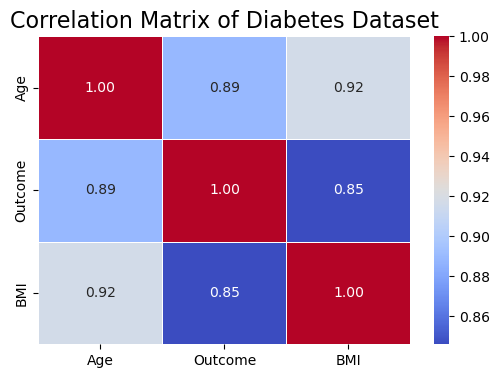

In [17]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))

# Compute the correlation matrix
corr_matrix = df.corr()

# Create heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Matrix of Diabetes Dataset', fontsize=16)
plt.show()



<h1 style="color:white; background-color:#4CAF50; padding:10px; border-radius:10px; text-align:center;">
  Model Development (Fit Model):
</h1>

In [19]:
# Gerekli kütüphaneleri yükleme
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Diabetes veri setini yükleyip DataFrame'e dönüştürme
diabetes_data = load_diabetes()
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Özellik ve hedef değişkenleri tanımlama (örneğin, 'bmi' özelliği)
X = df[['bmi']]  # 'bmi' özelliği
Y = df['target']  # Hedef değişken (şeker hastalığı ilerlemesi)

# Doğrusal regresyon modelini oluşturma
lm = LinearRegression()

# Modeli eğitme (fit)
lm.fit(X, Y)

# R² değerini hesaplama
r2_score = lm.score(X, Y)
print(f"R² Değeri: {r2_score}")


R² Değeri: 0.3439237602253802
